# WEEK_9

In [1]:
import numpy as npy
import pandas as pan
import matplotlib.pyplot as matplt
import seaborn as sea
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
full_bank = pan.read_csv('bank-full.csv', sep = ';')

In [3]:
full_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
full_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
full_bank.shape

(45211, 17)

In [6]:
full_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
def nullVal(full_bank):
    missing_num = full_bank.isnull().sum()
    missing_percent = (100 * missing_num / len(full_bank))
    concatinated_value = pan.concat([missing_num, missing_percent], axis = 1)
    
    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(full_bank.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order  


In [29]:
missing_num = nullVal(full_bank)

Full Bank Data has a total of '17' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot:>

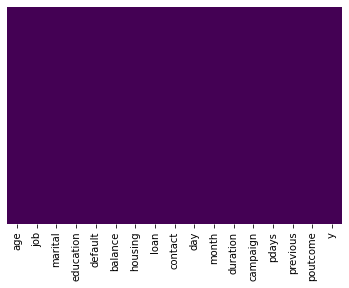

In [9]:
sea.heatmap(full_bank.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Campaign'}, xlabel='campaign'>

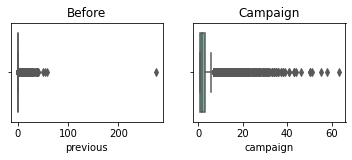

In [10]:
matplt.subplot(2, 2, 3)
matplt.title("Before")
sea.boxplot(full_bank['previous'], palette = 'Set2', color= 'Brown')

matplt.subplot(2, 2, 4)
matplt.title("Campaign")
sea.boxplot(full_bank['campaign'], palette = 'Set2', color= 'Brown')

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Before'}, xlabel='previous'>

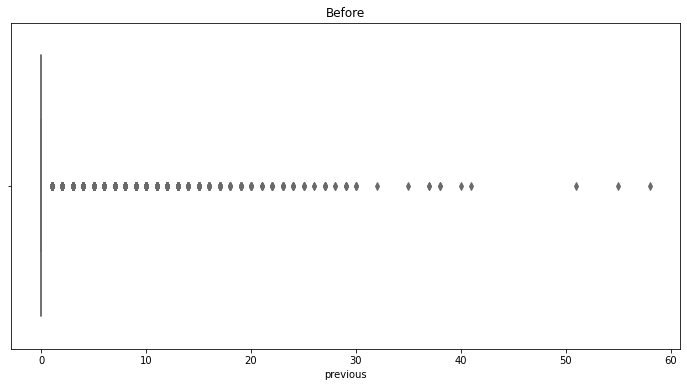

In [11]:
full_bank = (full_bank[full_bank['previous']<100])
matplt.figure(figsize = (12,6))
matplt.title('Before')
sea.boxplot(full_bank['previous'],palette = 'Set3', color = 'orange')

### DUPLICATE

In [12]:
full_bank[full_bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [13]:
full_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### DURATION

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration'}, xlabel='duration'>

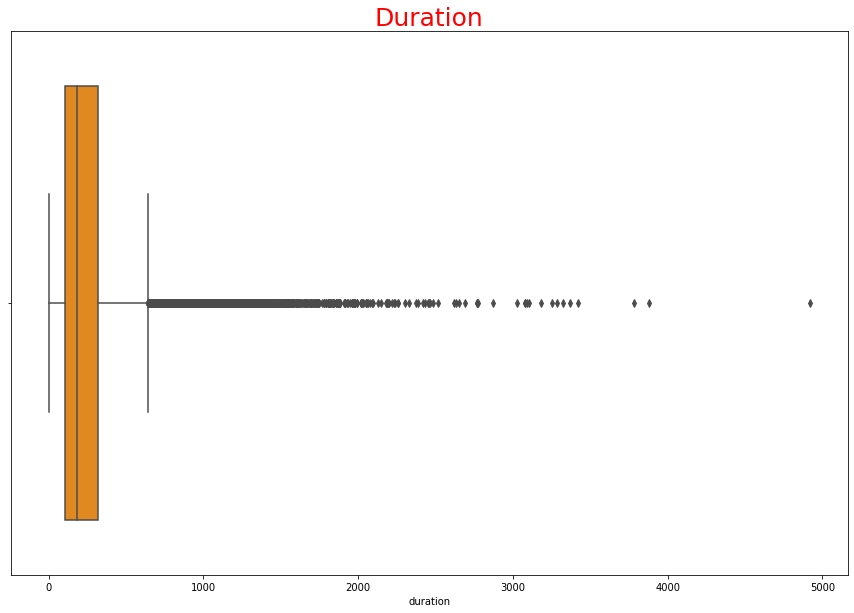

In [14]:
matplt.figure(figsize=(15,10))
matplt.title('Duration', color='red', fontsize = 25)
sea.boxplot(full_bank['duration'], color = 'darkorange')

In [15]:
full_bank.drop(full_bank[full_bank['duration'] >1000 ].index, inplace = True)

In [16]:
duration_outliers = []
def find_outliers(data):
    data = sorted(data)
    x = npy.percentile(data, 20)
    y = npy.percentile(data, 80)
    
    IQR = y- x
    lower_bound = x - (1.5*IQR)
    upper_bound = y + (1.5*IQR)
    
    for i in data:
        if(i<lower_bound or i> upper_bound):
            duration_outliers.append(i)
    return duration_outliers
    
outliers = find_outliers(full_bank['duration'])

print("Outliers using IQR method: ", min(outliers))
print("Total length of outliers using IQR method: ", len(outliers))

Outliers using IQR method:  739
Total length of outliers using IQR method:  1291


(-10.0, 1000.0)

<Figure size 1080x576 with 0 Axes>

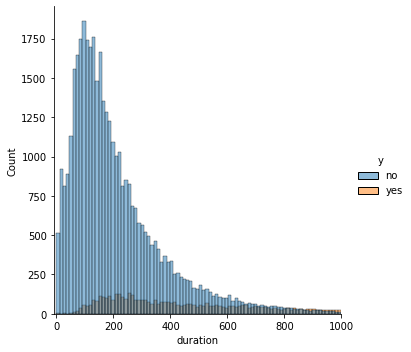

In [17]:
matplt.figure(figsize = (15,8))
sea.displot(x = full_bank['duration'], hue = full_bank['y'])
matplt.xlim(-10,1000)

In [18]:
print('Average duration for Opting the policy for "YES" ', full_bank[full_bank['y'] == 'yes']['duration'].median())
print('Average duration for not Opting the policy for "NO" ', full_bank[full_bank['y'] == 'no']['duration'].median())
 
median_y = full_bank[full_bank['y'] == 'yes']['duration'].median()
median_n = full_bank[full_bank['y'] == 'no']['duration'].median()

Average duration for Opting the policy for "YES"  374.0
Average duration for not Opting the policy for "NO"  162.0


In [19]:
full_bank['duration'] = npy.where(((full_bank['duration'] > 1000) & (full_bank['y'] == 'yes')), median_y, full_bank['duration'])
full_bank['duration'] = npy.where(((full_bank['duration'] > 1000) & (full_bank['y'] == 'no')), median_y, full_bank['duration'])

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

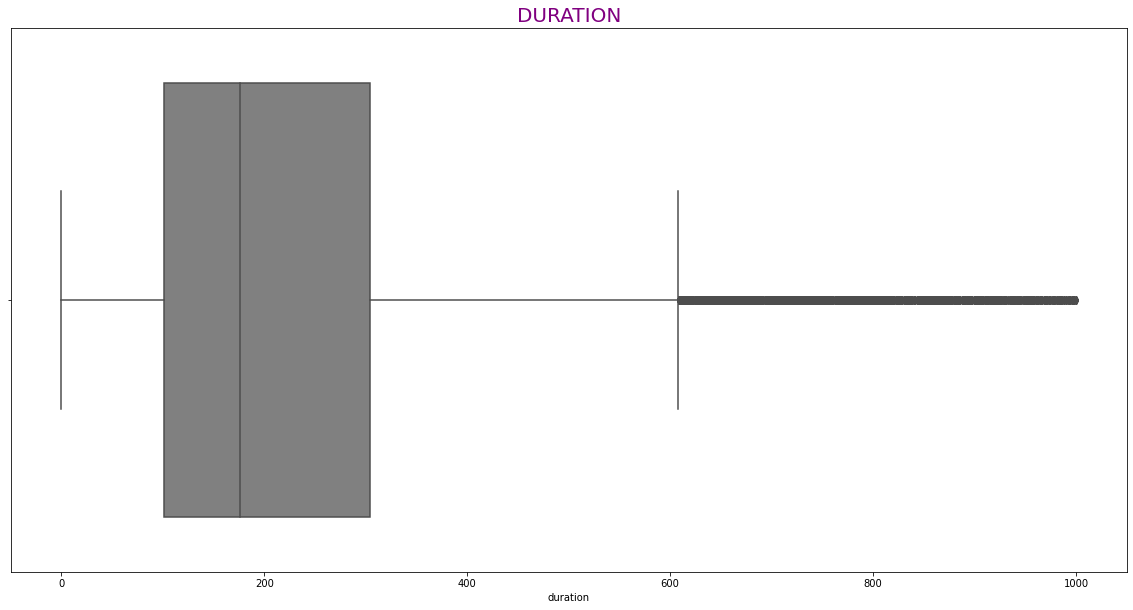

In [20]:
matplt.figure(figsize = (20,10))
matplt.title('DURATION',fontsize = 20,color = 'purple')
sea.boxplot(full_bank['duration'],color = 'gray')

### AGE

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age'}, xlabel='age'>

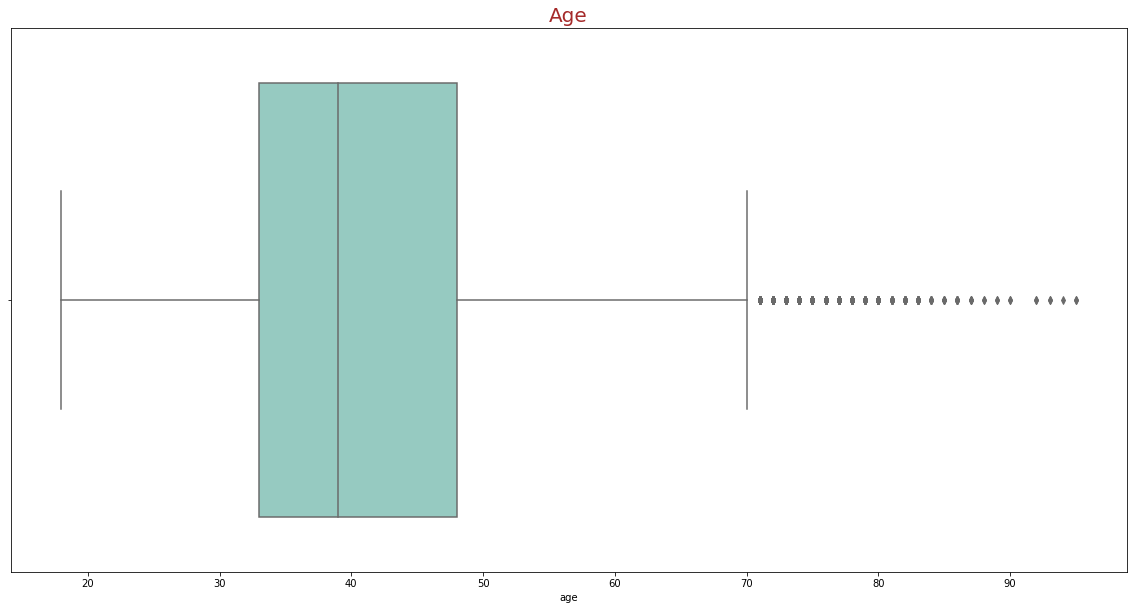

In [21]:
matplt.figure(figsize =(20 , 10) )
matplt.title('Age', color = 'Brown', fontsize = 20 )
sea.boxplot(full_bank['age'], palette = 'Set3', color = 'pink')

In [22]:
duration_outliers = []
def find_outliers(data):
    data = sorted(data)
    x = npy.percentile(data, 30)
    y = npy.percentile(data, 70)
    
    IQR = y- x
    lower_bound = x - (1.5*IQR)
    upper_bound = y + (1.5*IQR)
    
    for i in data:
        if(i<lower_bound or i> upper_bound):
            duration_outliers.append(i)
    return duration_outliers
    
outliers = find_outliers(full_bank['age'])

print("Outliers using IQR method: ", set(outliers))
print("Total length of outliers using IQR method: ", len(outliers))

Outliers using IQR method:  {65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95}
Total length of outliers using IQR method:  788


In [23]:
full_bank.query('age > 65 & y == "yes" ').count().head(1)


age    309
dtype: int64

In [24]:
full_bank.query('age > 65 & y=="no"').count().head(1)

age    421
dtype: int64

In [25]:
full_bank['campaign'] = npy.log(full_bank['campaign'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ece578f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ece5886d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ece578d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ece588df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ece5931c0>],
 'means': []}

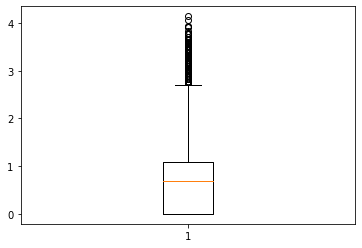

In [26]:
matplt.boxplot(full_bank['campaign'])

   ### File Output

In [27]:
full_bank.to_csv('Outliers_week_9_full_bank.csv')
